## Import all the needed packages
install the tensorflow_decision_forests to implement the Random Forest Clasifier.
Pandas will be needed to import the data set from csv file to the application. Its serves the purpose of matinaning the data in DataFrame structure.
Matplotlib will be needed to plot the data. 

In [ ]:
!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

## Import the data from csv file

In [53]:
Data=pandas.read_csv("//content/heart.csv")
print(Data.head())

   Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0   40   M           ATA  ...      0.0        Up             0
1   49   F           NAP  ...      1.0      Flat             1
2   37   M           ATA  ...      0.0        Up             0
3   48   F           ASY  ...      1.5      Flat             1
4   54   M           NAP  ...      0.0        Up             0

[5 rows x 12 columns]


## Clean the data
Cleaning of the data involves checking the data of each feature is either categorical or numerical. Its always better to maintain the data of feature to be either of them and not mixture. It is also essential to check if there is any anomaly in the data. 
we are doing this by plotting the histogram of the feature data.

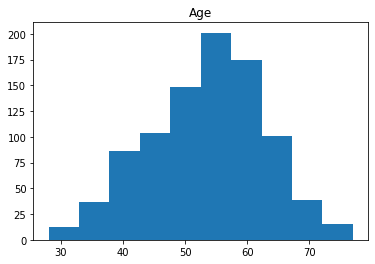

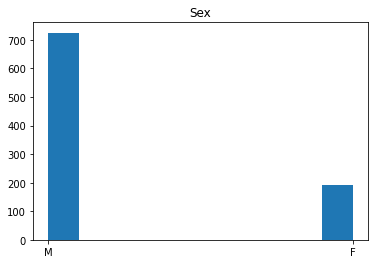

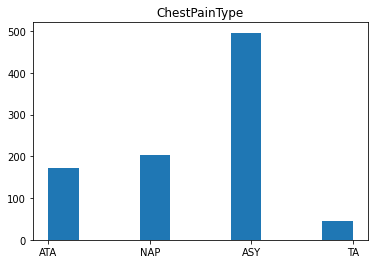

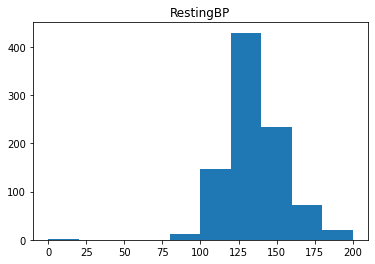

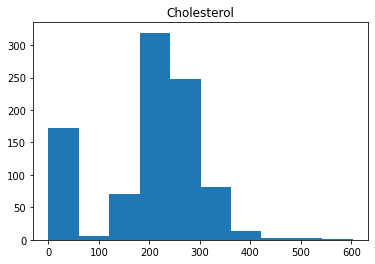

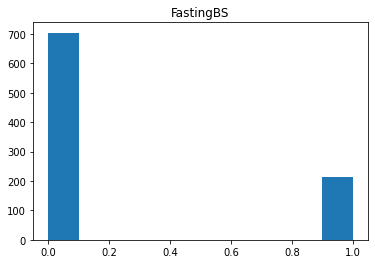

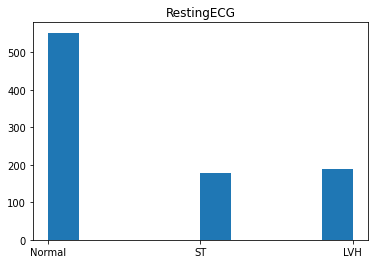

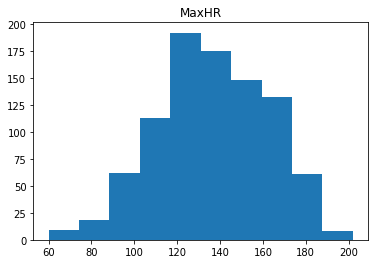

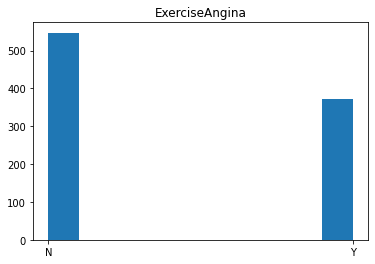

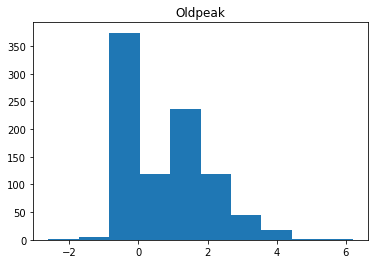

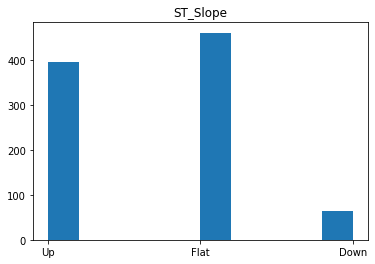

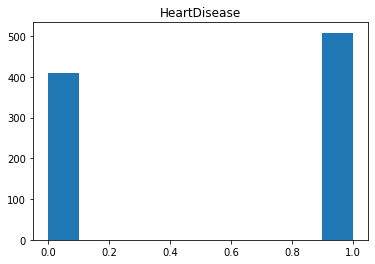

In [54]:
Data.dtypes
columns=list(Data.columns)
for i in range(len(columns)):
    uniques=Data[columns[i]]
    plt.figure(i)
    plt.hist(uniques)
    plt.title(columns[i])

Cleaning of the data also involves the removal of the null/nan values from the data set. Hence check if there is any null value in the data. if it is there remove those samples from the data

In [55]:
#Check if there is any null value
Data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Split the dataset to train and test dataset.
once the data is cleaned split the main data set to train and test data set. Train data set will be needed to train the model, while the test dataset will be helpful in understanding if new data comes how accurately it will predict the disease.

In [56]:
#Split the Data in Train dataset and Test datast
train_df = Data.sample(frac=0.9,random_state=200)
test_df=Data.drop(train_df.index)

# Convert the pandas DataFrame to TensorFlow dataset structure

In [57]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="HeartDisease")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="HeartDisease")

## Train the Gradient Boost Decision Tree Model

In [58]:
# Train the model
#model = tfdf.keras.RandomForestModel(num_trees=1000)
model = tfdf.keras.GradientBoostedTreesModel(num_trees=500, max_depth=8)
model.fit(train_ds)
model.compile(metrics=["accuracy"])

13/13 [==============================] - 1s 37ms/step


## Check the accuracy of the model

In [59]:
print("Accuracy of the Model:",model.evaluate(test_ds)[1])

2/2 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9022
Accuracy of the Model: 0.9021739363670349


## Save the model

In [60]:
# Export the model to a TensorFlow SavedModel
model.save("project/HeartDiseasePrediction")

INFO:tensorflow:Assets written to: project/HeartDiseasePrediction/assets


INFO:tensorflow:Assets written to: project/HeartDiseasePrediction/assets
